# PROBLEM STATEMENT

Success in school is essential. Academically successful adults are more likely to have job opportunities. Also, those who succeed intellectually are less likely to commit crimes.

Not every student comes from a similar background. Some kids' families provide them with unwavering support, while other students' families are discordant. Success in the classroom can be impacted by a variety of factors. To that purpose, based on the student's background, I will develop a machine learning model to forecast the worth of both math and Portuguese courses. I sourced the datasets I used from UCI.

### DATASET OVERVIEW

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 


Attribute Information:

## Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ 
secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

In [1120]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import pylab as p 
import matplotlib.pyplot as plt
%matplotlib inline

In [1121]:
import io
%cd '/Users/avishma/Desktop/Charish GIthub Competition'

/Users/avishma/Desktop/Charish GIthub Competition


In [1122]:
# reading the data
data_mat=pd.read_excel('KPM Student.xlsx')
data_por=pd.read_excel('student-por.xlsx')

In [1123]:
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [1124]:
data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [1125]:
data=pd.concat([data_mat,data_por],axis=0)

In [1126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [1127]:
# getting the shape of the data
data.shape

(1044, 33)

In [1128]:
duplicated=data.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are:{}'.format(duplicated))
else:
    print('Dataset contains no duplicate values')

Dataset contains no duplicate values


# Exploratory Data Analysis
What I have done on this stage:

Descriptive Analysis

Univariate Analysis

Multivariate Analysis

Business Insight As Business Recommendation

In [1129]:
#Creating The Total Grade Column
data['total grade'] = (data['G1']+data['G2']+data['G3'])/3
data = data.drop(['G1','G2','G3'],axis=1)

In [1130]:
# getting the shape of the data
data.shape

(1044, 31)

In [1131]:
# looking at the head of the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667


# Descriptive Statistics

In [1132]:
# describing the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,1044.0,2.603448,1.124907,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,1044.0,2.387931,1.099938,0.000000,1.000000,2.000000,3.000000,4.000000
traveltime,1044.0,1.522989,0.731727,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,1044.0,1.970307,0.834353,1.000000,1.000000,2.000000,2.000000,4.000000
failures,1044.0,0.264368,0.656142,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,1044.0,3.935824,0.933401,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,1044.0,3.201149,1.031507,1.000000,3.000000,3.000000,4.000000,5.000000
goout,1044.0,3.156130,1.152575,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,1044.0,1.494253,0.911714,1.000000,1.000000,1.000000,2.000000,5.000000


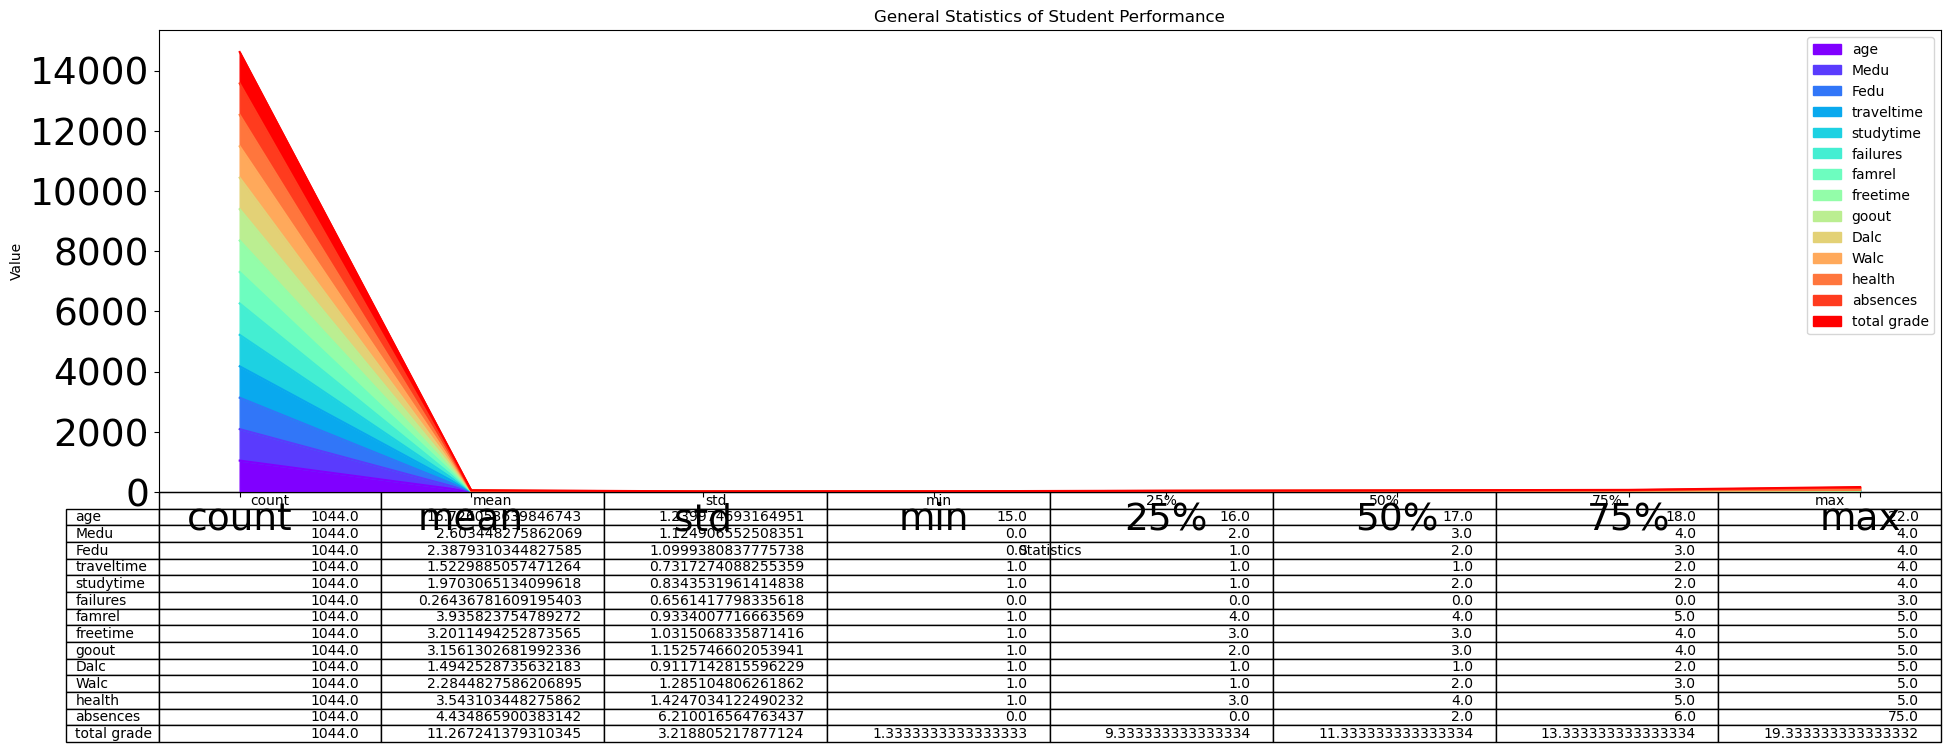

In [1133]:
data.describe().plot(kind = "area",fontsize=27, figsize = (23,6), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Student Performance")
plt.show()

In [1134]:
# lets check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [1135]:
# lets check the percentage of missing data in each columns present in the data

no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

school         0.0
sex            0.0
age            0.0
address        0.0
famsize        0.0
Pstatus        0.0
Medu           0.0
Fedu           0.0
Mjob           0.0
Fjob           0.0
reason         0.0
guardian       0.0
traveltime     0.0
studytime      0.0
failures       0.0
schoolsup      0.0
famsup         0.0
paid           0.0
activities     0.0
nursery        0.0
higher         0.0
internet       0.0
romantic       0.0
famrel         0.0
freetime       0.0
goout          0.0
Dalc           0.0
Walc           0.0
health         0.0
absences       0.0
total grade    0.0
dtype: float64


In [1136]:
duplicated=data.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are {}'.format(duplicated))
else:
    print('Dataset contains no duplicate values')

Duplicated rows in dataset are 2


In [1137]:
duplicated=data[data.duplicated(keep=False)]
duplicated.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total grade
30,GP,M,15,U,GT3,T,4,4,health,services,...,yes,no,5,4,2,3,4,5,0,10.666667
71,GP,M,15,U,GT3,T,4,2,other,other,...,yes,no,3,3,3,1,1,3,0,10.000000
30,GP,M,15,U,GT3,T,4,4,health,services,...,yes,no,5,4,2,3,4,5,0,10.666667
71,GP,M,15,U,GT3,T,4,2,other,other,...,yes,no,3,3,3,1,1,3,0,10.000000


In [1138]:
data=data.drop_duplicates(keep=False)

# Hypothesis Testing

### Chi2 Test

In [1139]:
from scipy.stats import chi2_contingency

In [1140]:
chi2_contingency(pd.crosstab(data.school,data.address))
# Since p-value=1.0408 is less than 0.05, Reject Null

(119.01233207352885,
 1.0408041840722762e-27,
 1,
 array([[210.46153846, 557.53846154],
        [ 74.53846154, 197.46153846]]))

In [1141]:
chi2_contingency(pd.crosstab(data.famsize,data.Pstatus))
# Since p-value=5.4806 is less than 0.05, Reject Null

(42.997633135693434,
 5.4806129263883925e-11,
 1,
 array([[ 85.39807692, 648.60192308],
        [ 35.60192308, 270.39807692]]))

In [1142]:
chi2_contingency(pd.crosstab(data.Mjob,data.Fjob))
# Since p-value=1.0706 is less than 0.05, Reject Null

(204.29964873423665,
 1.070604521565209e-34,
 16,
 array([[ 11.56538462,   7.64807692, 108.56538462,  54.09615385,
          12.125     ],
        [  4.76923077,   3.15384615,  44.76923077,  22.30769231,
           5.        ],
        [ 23.66730769,  15.65096154, 222.16730769, 110.70192308,
          24.8125    ],
        [ 14.24807692,   9.42211538, 133.74807692,  66.64423077,
          14.9375    ],
        [  7.75      ,   5.125     ,  72.75      ,  36.25      ,
           8.125     ]]))

In [1143]:
chi2_contingency(pd.crosstab(data.romantic,data.internet))
# Since p-value=0.1143 is more than 0.05, Fail to Reject Null

(2.4925179520515197,
 0.11438858671535775,
 1,
 array([[139.58942308, 529.41057692],
        [ 77.41057692, 293.58942308]]))

In [1144]:
chi2_contingency(pd.crosstab(data.schoolsup,data.famsup))
# Since p-value=0.0069 is less than 0.05, Reject Null

(7.291056976188417,
 0.006929869320590862,
 1,
 array([[356.00192308, 564.99807692],
        [ 45.99807692,  73.00192308]]))

### Anova

In [1145]:
data['total grade'].groupby(data.Mjob).mean()

Mjob
at_home     10.439863
health      12.554167
other       10.968094
services    11.559275
teacher     12.115385
Name: total grade, dtype: float64

In [1146]:
# Split Data
at_home=data[data.Mjob==1]
health=data[data.Mjob==2]
other=data[data.Mjob==3]
services=data[data.Mjob==4]
teacher=data[data.Mjob==5]


In [1147]:
from scipy.stats import f_oneway

In [1148]:
f_oneway(at_home['total grade'],health['total grade'],other['total grade'],services['total grade'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

### 2 Sample Independent Test

In [1149]:
data['total grade'].groupby(data.schoolsup).mean()

schoolsup
no     11.391965
yes    10.333333
Name: total grade, dtype: float64

In [1150]:
np.round(data['total grade'].groupby(data.schoolsup).var(),2)

schoolsup
no     10.95
yes     5.17
Name: total grade, dtype: float64

In [1151]:
# Split Data
schoolsup_no=data[data.schoolsup==0]
schoolsup_yes=data[data.schoolsup==1]

In [1152]:
from scipy.stats import ttest_ind

In [1153]:
ttest_ind(schoolsup_no['total grade'],schoolsup_yes['total grade'],equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [1154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 648
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       1040 non-null   object 
 1   sex          1040 non-null   object 
 2   age          1040 non-null   int64  
 3   address      1040 non-null   object 
 4   famsize      1040 non-null   object 
 5   Pstatus      1040 non-null   object 
 6   Medu         1040 non-null   int64  
 7   Fedu         1040 non-null   int64  
 8   Mjob         1040 non-null   object 
 9   Fjob         1040 non-null   object 
 10  reason       1040 non-null   object 
 11  guardian     1040 non-null   object 
 12  traveltime   1040 non-null   int64  
 13  studytime    1040 non-null   int64  
 14  failures     1040 non-null   int64  
 15  schoolsup    1040 non-null   object 
 16  famsup       1040 non-null   object 
 17  paid         1040 non-null   object 
 18  activities   1040 non-null   object 
 19  nursery

In [1155]:
data.activities.value_counts()

no     524
yes    516
Name: activities, dtype: int64

# Univariate Analysis

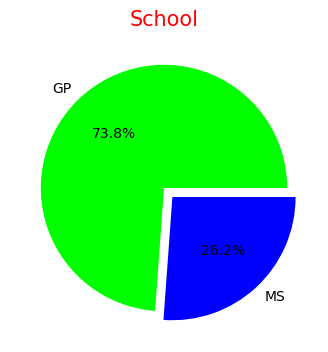

In [1156]:
colors = ['lime','blue']
explode = [0,0.1,]
plt.figure(figsize = (4,4))
plt.pie(data['school'].value_counts().values, explode = explode, labels = data['school'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('School',color='Red',fontsize=15)
plt.show()

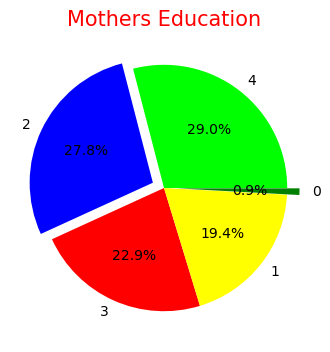

In [1157]:
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0.1]
plt.figure(figsize = (4,4))
plt.pie(data['Medu'].value_counts().values, explode = explode, labels = data['Medu'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('Mothers Education',color='Red',fontsize=15)
plt.show()

#Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 
#2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

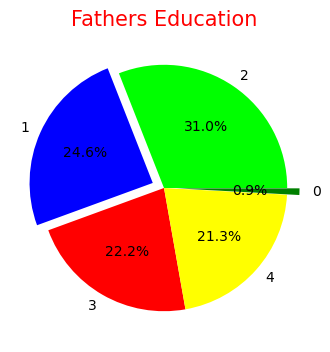

In [1158]:
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0.1]
plt.figure(figsize = (4,4))
plt.pie(data['Fedu'].value_counts().values, explode = explode, labels = data['Fedu'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('Fathers Education',color='Red',fontsize=15)
plt.show()

#Fother's education (numeric: 0 - none, 1 - primary education (4th grade), 
#2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

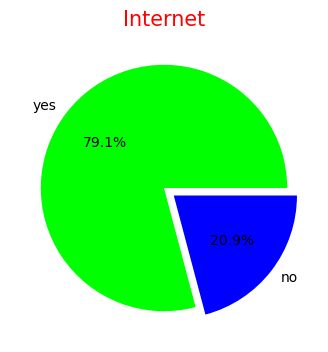

In [1159]:
colors = ['lime','blue']
explode = [0,0.1]
plt.figure(figsize = (4,4))
plt.pie(data['internet'].value_counts().values, explode = explode, labels = data['internet'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('Internet',color='Red',fontsize=15)
plt.show()

In [1160]:
data.internet.value_counts()

yes    823
no     217
Name: internet, dtype: int64

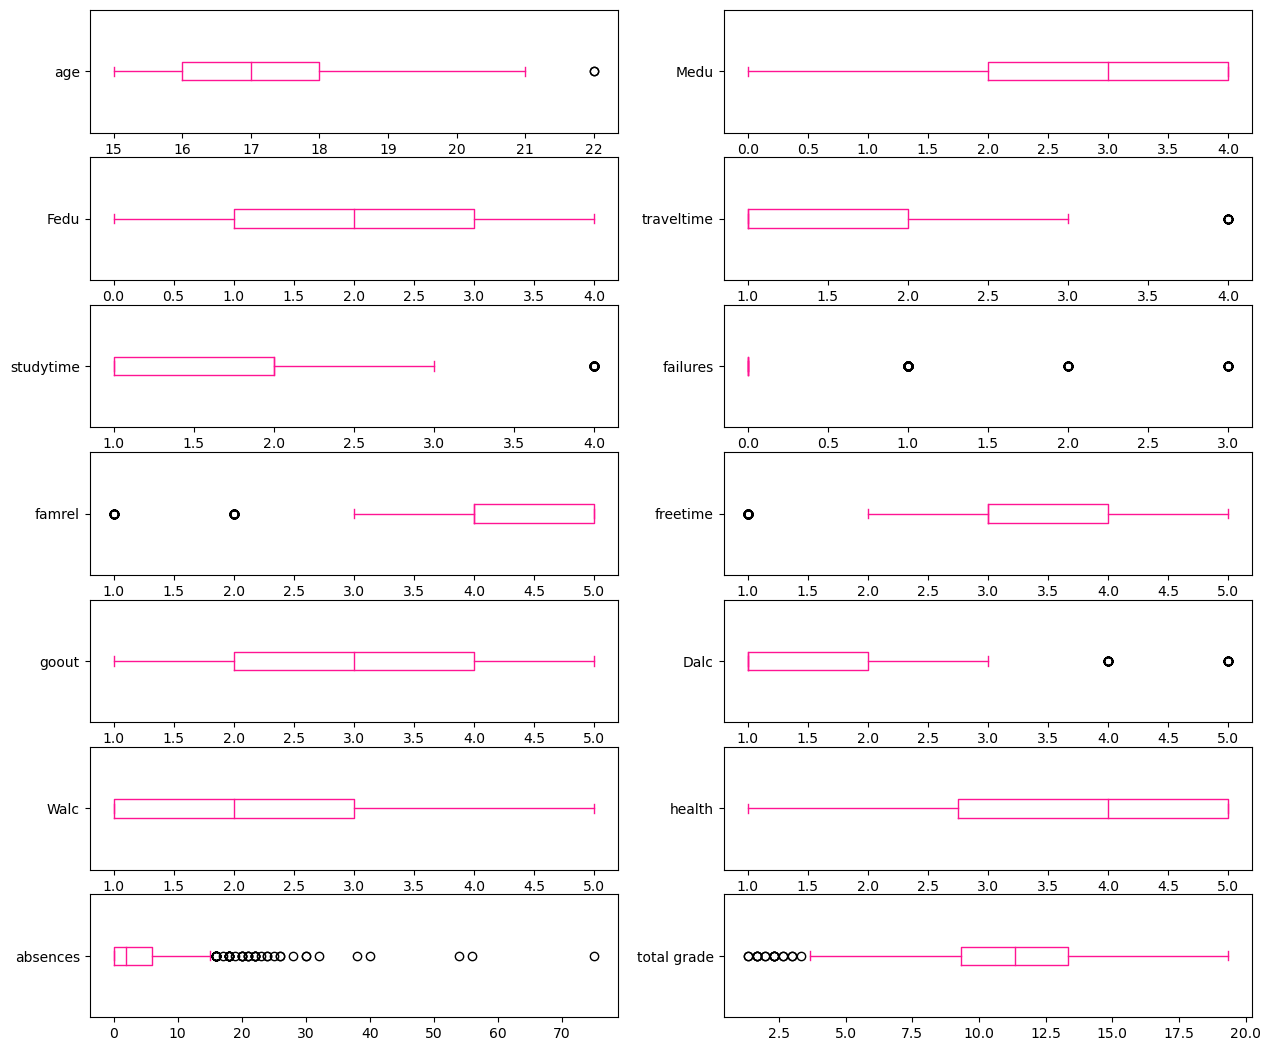

In [1161]:
Group_Box_Plot=data.plot(kind='box', subplots=True, layout=(8,2),
sharex=False,sharey=False,figsize=(15, 15), 
color='deeppink',vert=False);

# Inferential Statistics

In [1162]:
* Lets check the Probability of Students Scoring More than 50 Marks in Total Grade*

SyntaxError: invalid syntax (729820176.py, line 1)

In [ ]:
data['total grade'].nlargest(15)

In [ ]:
total_students = data.shape[0]
students_score_more_than_15 = data[data['total grade'] > 15].shape[0]
print(students_score_more_than_15)

probability_of_students_scoring_more_than_15 = (students_score_more_than_15/total_students)*100
print("Probability of Students Scoring more than 15 marks :",probability_of_students_scoring_more_than_15)

In [ ]:
data.absences.nlargest(5)

In [ ]:
total_students = data.shape[0]
student_absences_more_than_50 = data[data['absences'] > 50].shape[0]
print(student_absences_more_than_50)

probability_of_student_absences_more_than_50 = (student_absences_more_than_50/total_students)*100
print("Probability of Students absences more than 50 marks :",probability_of_student_absences_more_than_50)

In [ ]:

print( 'Skewness for data : ', data['total grade'].skew())
plt.figure(figsize=(5,5))
sns.distplot(data['total grade'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

#skewness < 0 : more weight in the right tail of the distribution


Kurtosis for data :  0.23163700722991942


/var/folders/m_/nmwrqc3j5f9dbpczh0mf3wz80000gn/T/ipykernel_85569/2086897471.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total grade'])


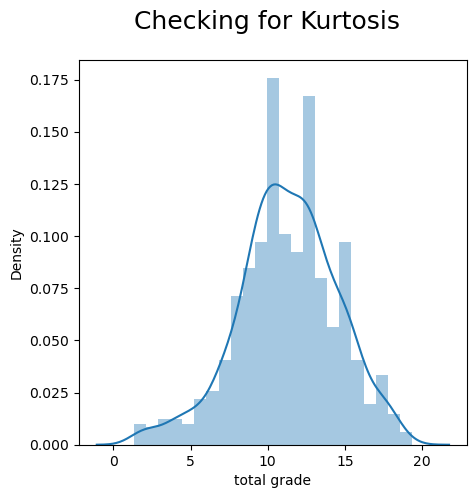

In [1163]:
print( 'Kurtosis for data : ', data['total grade'].kurt())
plt.figure(figsize=(5,5))
sns.distplot(data['total grade'])

plt.suptitle('Checking for Kurtosis', fontsize = 18)
plt.show()

# Bivariate Analysis
Since most of the attributes are categorical, we will look at discreet distributions of various variables with the target variable.

<AxesSubplot: xlabel='Pstatus', ylabel='total grade'>

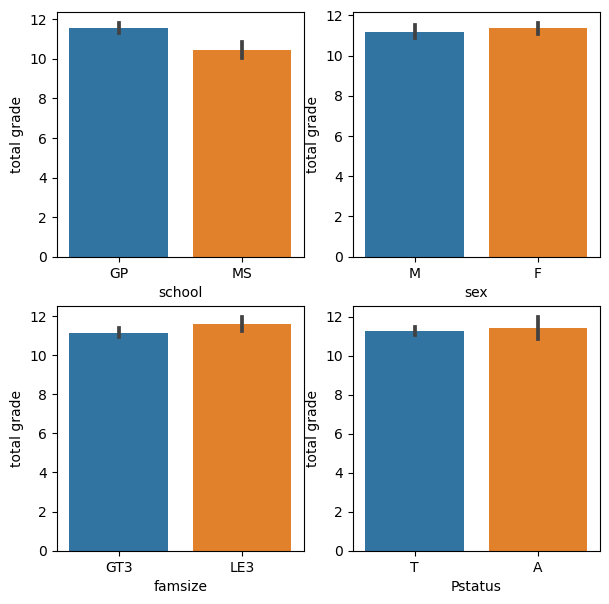

In [1164]:
#Visualize categorical variables with numerical variables and give conclusions
fig, axarr  = plt.subplots(2,2,figsize=(7,7))
sns.barplot(x='school', y='total grade', data=data, order=['GP','MS'], ax=axarr[0,0])
sns.barplot(x='sex', y='total grade', data=data, order=['M','F'], ax=axarr[0,1])
sns.barplot(x='famsize', y='total grade', data=data, order=['GT3','LE3'], ax=axarr[1,0])
sns.barplot(x='Pstatus', y='total grade', data=data, order=['T','A'], ax=axarr[1,1])

/var/folders/m_/nmwrqc3j5f9dbpczh0mf3wz80000gn/T/ipykernel_85569/2484347588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total grade'])


<AxesSubplot: xlabel='total grade', ylabel='Density'>

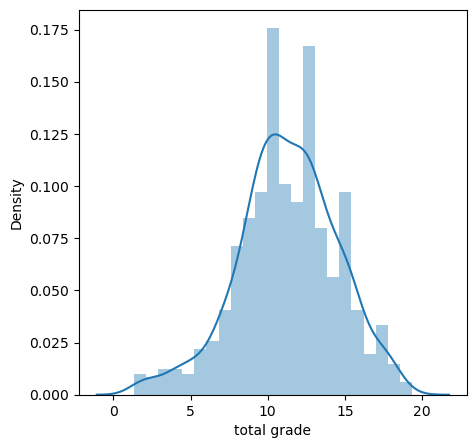

In [1165]:
plt.figure(figsize=(5,5))
sns.distplot(data['total grade'])

<AxesSubplot: xlabel='famsup', ylabel='total grade'>

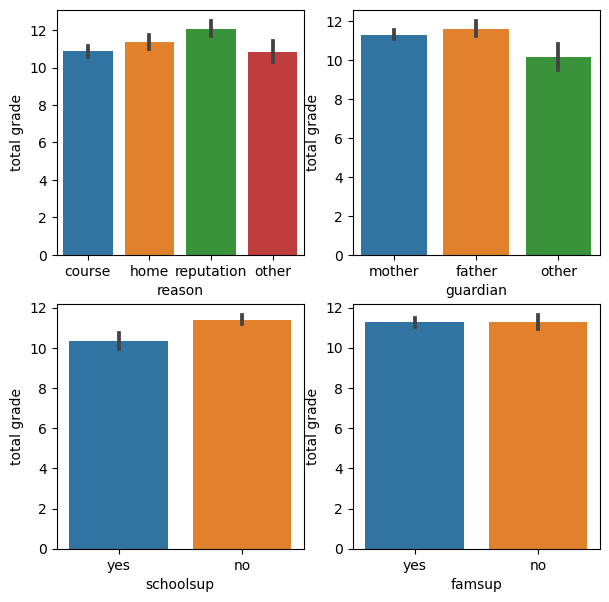

In [1166]:
fig, axarr  = plt.subplots(2,2,figsize=(7,7))
sns.barplot(x='reason', y='total grade', data=data, order=['course','home','reputation','other'], ax=axarr[0,0])
sns.barplot(x='guardian', y='total grade', data=data, order=['mother','father','other'], ax=axarr[0,1])
sns.barplot(x='schoolsup', y='total grade', data=data, order=['yes','no'], ax=axarr[1,0])
sns.barplot(x='famsup', y='total grade', data=data, order=['yes','no'], ax=axarr[1,1])


famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)

ValueError: Could not interpret input 'travel time'

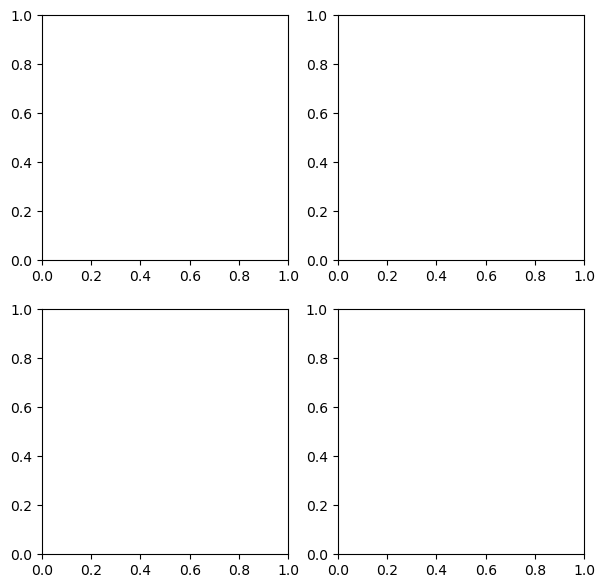

In [1167]:
fig, axarr  = plt.subplots(2,2,figsize=(7,7))
sns.barplot(x='travel time', y='total grade', data=data, order=['yes','no'], ax=axarr[0,0])
sns.barplot(x='activities', y='total grade', data=data, order=['yes','no'], ax=axarr[0,1])
sns.barplot(x='nursery', y='total grade', data=data, order=['yes','no'], ax=axarr[1,0])
sns.barplot(x='famsup', y='total grade', data=data, order=['yes','no'], ax=axarr[1,1])

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(7,7))
sns.barplot(x='paid', y='total grade', data=data, order=['yes','no'], ax=axarr[0,0])
sns.barplot(x='activities', y='total grade', data=data, order=['yes','no'], ax=axarr[0,1])
sns.barplot(x='nursery', y='total grade', data=data, order=['yes','no'], ax=axarr[1,0])
sns.barplot(x='famsup', y='total grade', data=data, order=['yes','no'], ax=axarr[1,1])



famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no): We can see people who 
    didn't attend extra classes have scored a bit more.
activities - extra-curricular activities (binary: yes or no): We can see people with extracurricular activities have 
    scored a bit more than the rest.
nursery - attended nursery school (binary: yes or no): 

In [ ]:
data.higher.value_counts()

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(7,7))
sns.barplot(x='higher', y='total grade', data=data, order=['yes','no'], ax=axarr[0,0])
sns.barplot(x='internet', y='total grade', data=data, order=['yes','no'], ax=axarr[0,1])
sns.barplot(x='romantic', y='total grade', data=data, order=['yes','no'], ax=axarr[1,0])


In [ ]:
#Variables based on fathers and Mother job:

plt.figure(figsize=(10,5))
sns.boxplot(x=data['Fjob'],y=data['total grade'])

<AxesSubplot: xlabel='Mjob', ylabel='total grade'>

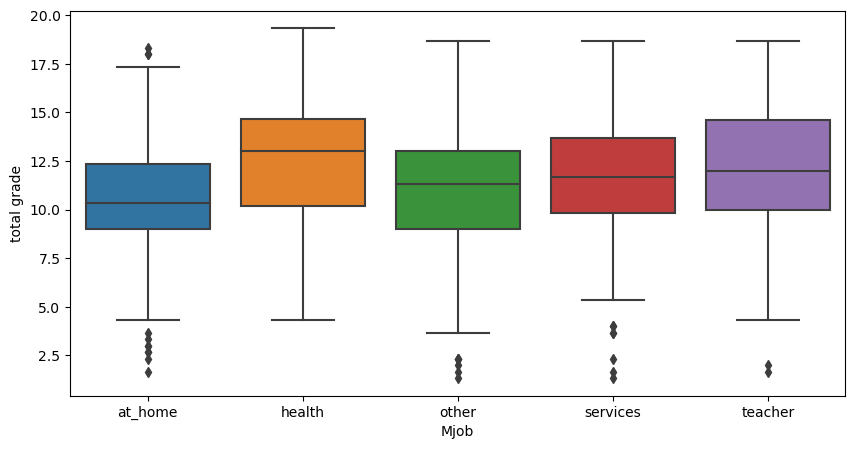

In [1168]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Mjob'],y=data['total grade'])

In [1169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 648
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       1040 non-null   object 
 1   sex          1040 non-null   object 
 2   age          1040 non-null   int64  
 3   address      1040 non-null   object 
 4   famsize      1040 non-null   object 
 5   Pstatus      1040 non-null   object 
 6   Medu         1040 non-null   int64  
 7   Fedu         1040 non-null   int64  
 8   Mjob         1040 non-null   object 
 9   Fjob         1040 non-null   object 
 10  reason       1040 non-null   object 
 11  guardian     1040 non-null   object 
 12  traveltime   1040 non-null   int64  
 13  studytime    1040 non-null   int64  
 14  failures     1040 non-null   int64  
 15  schoolsup    1040 non-null   object 
 16  famsup       1040 non-null   object 
 17  paid         1040 non-null   object 
 18  activities   1040 non-null   object 
 19  nursery

In [1170]:
data.school.value_counts()

GP    768
MS    272
Name: school, dtype: int64

/var/folders/m_/nmwrqc3j5f9dbpczh0mf3wz80000gn/T/ipykernel_85569/632302315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop('total grade',axis=1).corr(),annot=True)


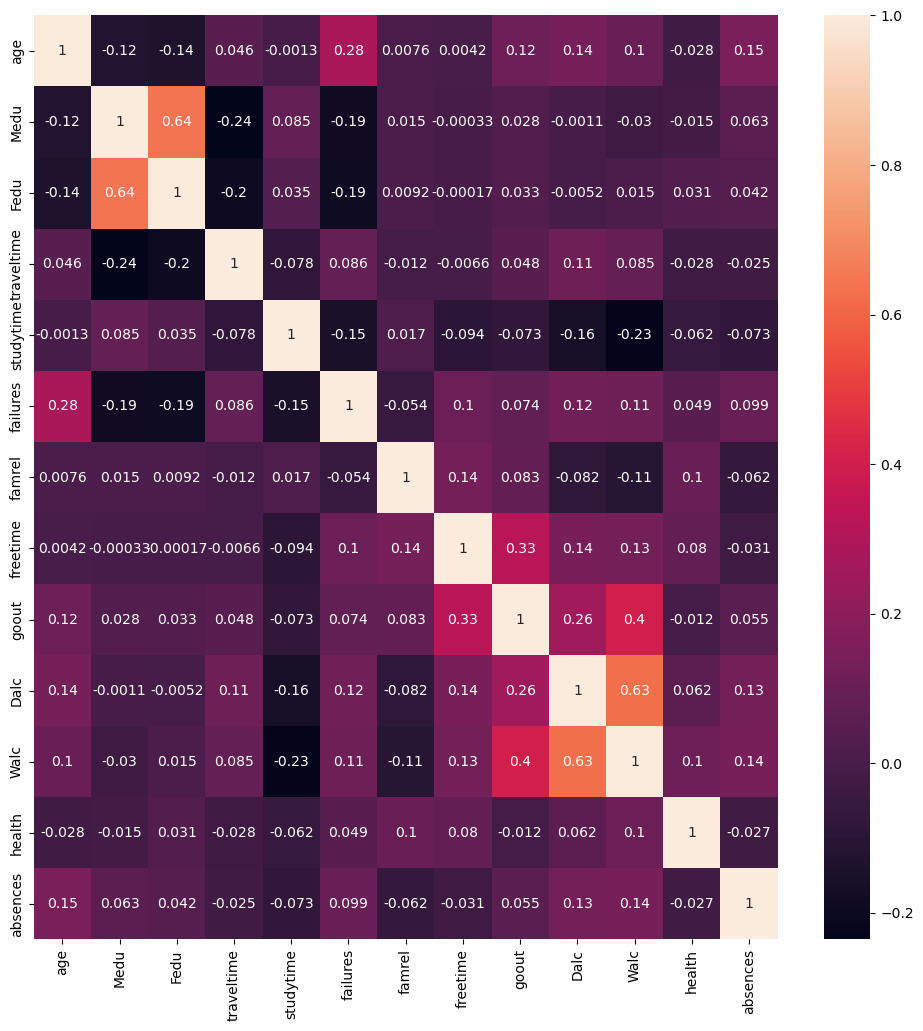

In [1171]:
plt.figure(figsize=(12,12))
sns.heatmap(data.drop('total grade',axis=1).corr(),annot=True)
plt.show()

<Figure size 600x600 with 0 Axes>

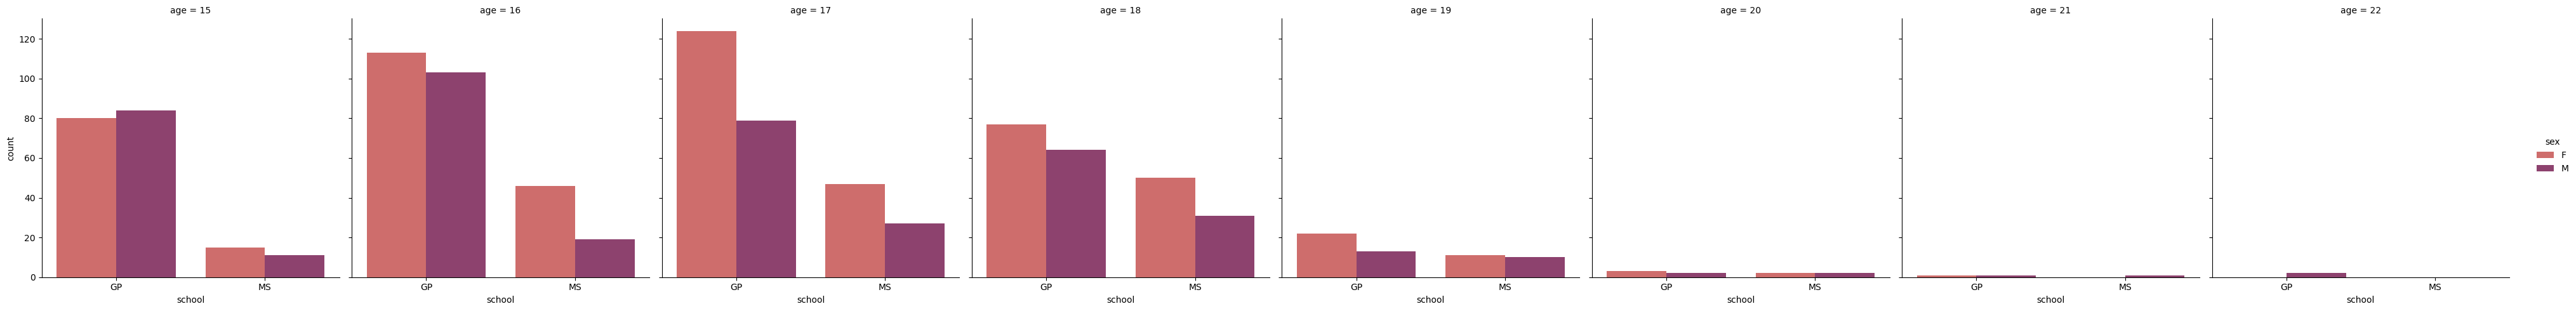

In [1172]:
plt.figure(figsize=(6,6))
sns.catplot(x='school', hue='sex', col='age', data=data, kind='count', palette='flare')
plt.show()

In [1173]:
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:


#age - student's age (numeric: from 15 to 22)
#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ #secondary education or 4 â€“ higher education)
#Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ #secondary education or 4 â€“ higher education)
#Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#goout - going out with friends (numeric: from 1 - very low to 5 - very high)
#Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#health - current health status (numeric: from 1 - very bad to 5 - very good)
#absences - number of school absences (numeric: from 0 to 93)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'Medu'}>,
        <AxesSubplot: title={'center': 'Fedu'}>,
        <AxesSubplot: title={'center': 'traveltime'}>],
       [<AxesSubplot: title={'center': 'studytime'}>,
        <AxesSubplot: title={'center': 'failures'}>,
        <AxesSubplot: title={'center': 'famrel'}>,
        <AxesSubplot: title={'center': 'freetime'}>],
       [<AxesSubplot: title={'center': 'goout'}>,
        <AxesSubplot: title={'center': 'Dalc'}>,
        <AxesSubplot: title={'center': 'Walc'}>,
        <AxesSubplot: title={'center': 'health'}>],
       [<AxesSubplot: title={'center': 'absences'}>,
        <AxesSubplot: title={'center': 'total grade'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

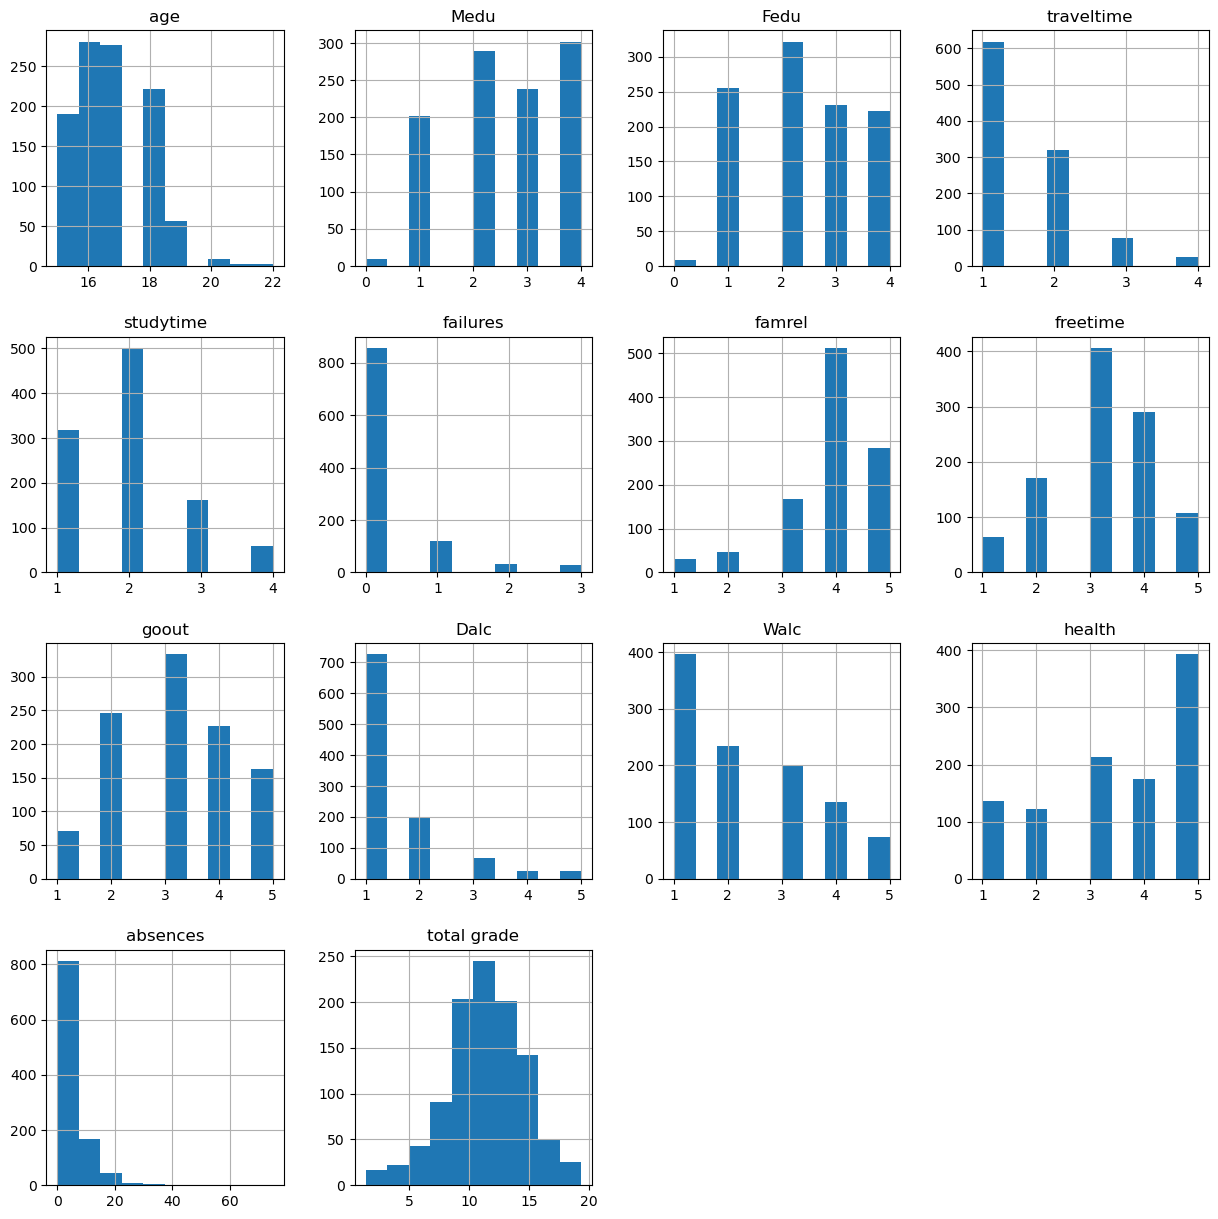

In [1174]:
data.hist(figsize=(15,15))

In [1175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 648
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       1040 non-null   object 
 1   sex          1040 non-null   object 
 2   age          1040 non-null   int64  
 3   address      1040 non-null   object 
 4   famsize      1040 non-null   object 
 5   Pstatus      1040 non-null   object 
 6   Medu         1040 non-null   int64  
 7   Fedu         1040 non-null   int64  
 8   Mjob         1040 non-null   object 
 9   Fjob         1040 non-null   object 
 10  reason       1040 non-null   object 
 11  guardian     1040 non-null   object 
 12  traveltime   1040 non-null   int64  
 13  studytime    1040 non-null   int64  
 14  failures     1040 non-null   int64  
 15  schoolsup    1040 non-null   object 
 16  famsup       1040 non-null   object 
 17  paid         1040 non-null   object 
 18  activities   1040 non-null   object 
 19  nursery

In [1176]:
objectcols=data.select_dtypes(include=['object'])
numericcols=data.select_dtypes(include=np.number)

In [1177]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 648
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1040 non-null   object
 1   sex         1040 non-null   object
 2   address     1040 non-null   object
 3   famsize     1040 non-null   object
 4   Pstatus     1040 non-null   object
 5   Mjob        1040 non-null   object
 6   Fjob        1040 non-null   object
 7   reason      1040 non-null   object
 8   guardian    1040 non-null   object
 9   schoolsup   1040 non-null   object
 10  famsup      1040 non-null   object
 11  paid        1040 non-null   object
 12  activities  1040 non-null   object
 13  nursery     1040 non-null   object
 14  higher      1040 non-null   object
 15  internet    1040 non-null   object
 16  romantic    1040 non-null   object
dtypes: object(17)
memory usage: 146.2+ KB


In [1178]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 648
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1040 non-null   int64  
 1   Medu         1040 non-null   int64  
 2   Fedu         1040 non-null   int64  
 3   traveltime   1040 non-null   int64  
 4   studytime    1040 non-null   int64  
 5   failures     1040 non-null   int64  
 6   famrel       1040 non-null   int64  
 7   freetime     1040 non-null   int64  
 8   goout        1040 non-null   int64  
 9   Dalc         1040 non-null   int64  
 10  Walc         1040 non-null   int64  
 11  health       1040 non-null   int64  
 12  absences     1040 non-null   int64  
 13  total grade  1040 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 121.9 KB


In [1179]:
cols = ['age','failures','Medu','Fedu','traveltime','studytime','Dalc','Walc','goout','freetime','famrel','health']
for cols in cols:
    data[cols]=data[cols].astype('object')


In [1180]:
objectcols=data.select_dtypes(include=['object'])
numericcols=data.select_dtypes(include=np.number)

In [1181]:
objectcols.traveltime.value_counts()

1    619
2    320
3     77
4     24
Name: traveltime, dtype: int64

<AxesSubplot: xlabel='Walc', ylabel='total grade'>

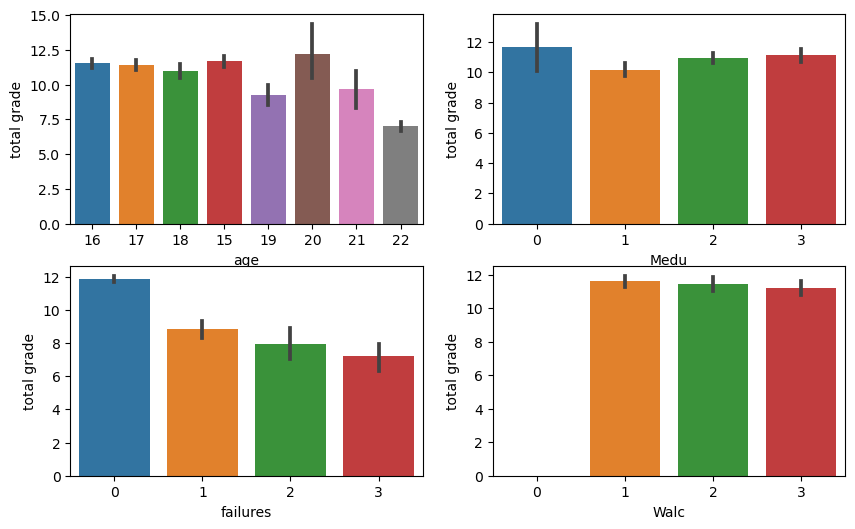

In [1182]:
fig, axarr  = plt.subplots(2,2,figsize=(10,6))
sns.barplot(x='age', y='total grade', data=data, order=[16,17,18,15,19,20,21,22], ax=axarr[0,0])
sns.barplot(x='failures', y='total grade', data=data, order=[0,1,2,3], ax=axarr[1,0])
sns.barplot(x='Medu', y='total grade', data=data, order=[0,1,2,3], ax=axarr[0,1])
sns.barplot(x='Walc', y='total grade', data=data, order=[0,1,2,3], ax=axarr[1,1])

<AxesSubplot: xlabel='Walc', ylabel='total grade'>

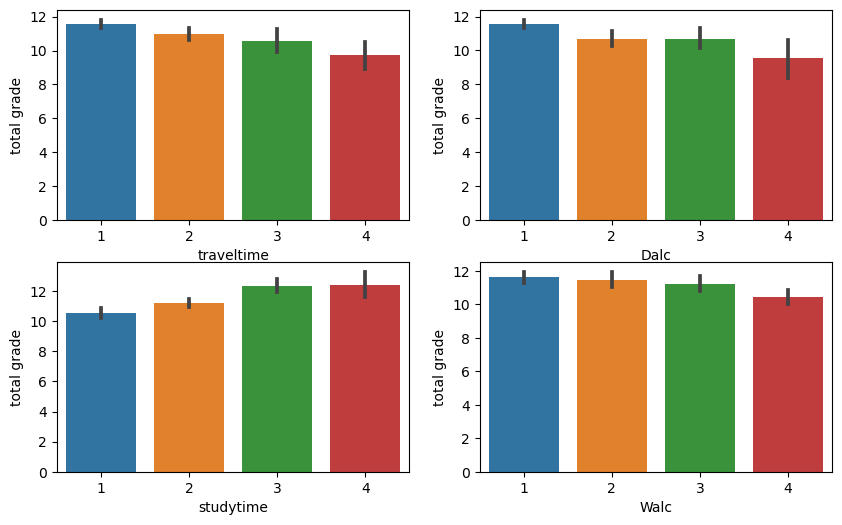

In [1183]:
fig, axarr  = plt.subplots(2,2,figsize=(10,6))
sns.barplot(x='traveltime', y='total grade', data=data, order=[1,2,3,4], ax=axarr[0,0])
sns.barplot(x='studytime', y='total grade', data=data, order=[1,2,3,4], ax=axarr[1,0])
sns.barplot(x='Dalc', y='total grade', data=data, order=[1,2,3,4], ax=axarr[0,1])
sns.barplot(x='Walc', y='total grade', data=data, order=[1,2,3,4], ax=axarr[1,1])

<AxesSubplot: xlabel='health', ylabel='total grade'>

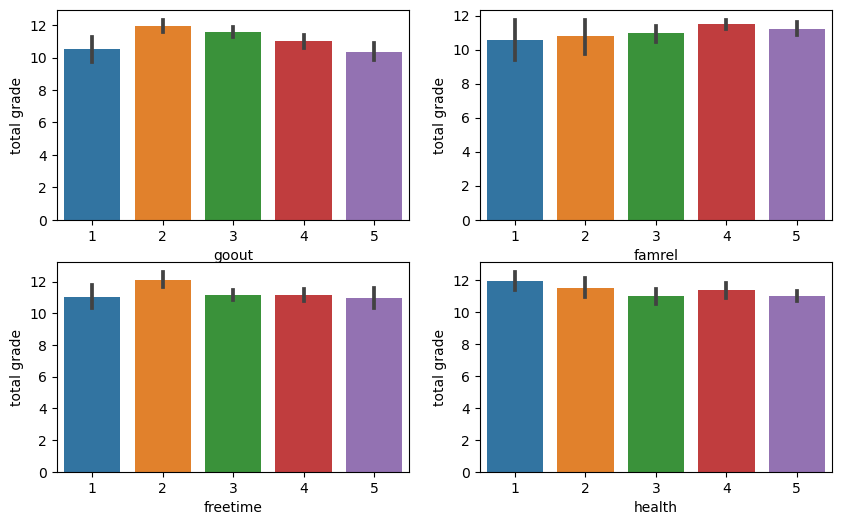

In [1184]:
fig, axarr  = plt.subplots(2,2,figsize=(10,6))
sns.barplot(x='goout', y='total grade', data=data, order=[1,2,3,4,5], ax=axarr[0,0])
sns.barplot(x='freetime', y='total grade', data=data, order=[1,2,3,4,5], ax=axarr[1,0])
sns.barplot(x='famrel', y='total grade', data=data, order=[1,2,3,4,5], ax=axarr[0,1])
sns.barplot(x='health', y='total grade', data=data, order=[1,2,3,4,5], ax=axarr[1,1])


In [1185]:
from sklearn.preprocessing import LabelEncoder

In [1186]:
le=LabelEncoder()

In [1187]:
object_encode=objectcols.apply(le.fit_transform)

In [1188]:
object_encode=pd.DataFrame(object_encode)

In [1189]:
object_encode.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,0,0,3,1,0,0,4,4,0,4,...,1,1,0,0,3,2,3,0,0,2
1,0,0,2,1,0,1,1,1,0,2,...,0,1,1,0,4,2,2,0,0,2
2,0,0,0,1,1,1,1,1,0,2,...,1,1,1,0,3,2,1,1,2,2
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,2,1,1,0,0,4
4,0,0,1,1,0,1,3,3,2,2,...,1,1,0,0,3,2,1,0,1,4


In [1190]:
from sklearn.preprocessing import StandardScaler

In [1191]:
scaler=StandardScaler()

In [1192]:
numeric_standard=scaler.fit_transform(numericcols.drop('total grade',axis=1))

In [1193]:
numeric_standard=pd.DataFrame(numeric_standard,columns=['absences'])

In [1194]:
numeric_standard.head()

,absences
0,0.249173
1,-0.072740
2,0.892999
3,-0.394653
4,-0.072740


In [1195]:
numeric_standard=numeric_standard.reset_index()

In [1196]:
object_encode=object_encode.reset_index()

In [1197]:
data_new=pd.concat([numeric_standard,object_encode],axis=1)

In [1198]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       1040 non-null   int64  
 1   absences    1040 non-null   float64
 2   index       1040 non-null   int64  
 3   school      1040 non-null   int64  
 4   sex         1040 non-null   int64  
 5   age         1040 non-null   int64  
 6   address     1040 non-null   int64  
 7   famsize     1040 non-null   int64  
 8   Pstatus     1040 non-null   int64  
 9   Medu        1040 non-null   int64  
 10  Fedu        1040 non-null   int64  
 11  Mjob        1040 non-null   int64  
 12  Fjob        1040 non-null   int64  
 13  reason      1040 non-null   int64  
 14  guardian    1040 non-null   int64  
 15  traveltime  1040 non-null   int64  
 16  studytime   1040 non-null   int64  
 17  failures    1040 non-null   int64  
 18  schoolsup   1040 non-null   int64  
 19  famsup      1040 non-null  

# Separating Features and Labels

In [1199]:
#Separating Features and Labels
X = data_new
y = data['total grade']

In [1200]:
print(X.shape)
print(y.shape)

(1040, 32)
(1040,)


In [1201]:
y.dtype

dtype('float64')

In [1202]:
y.head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: total grade, dtype: float64

<AxesSubplot: ylabel='Frequency'>

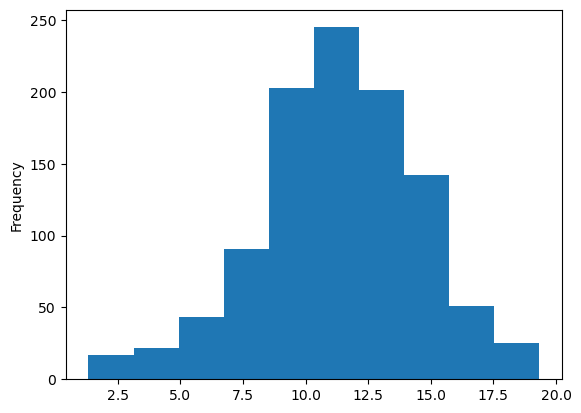

In [1203]:
y.plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

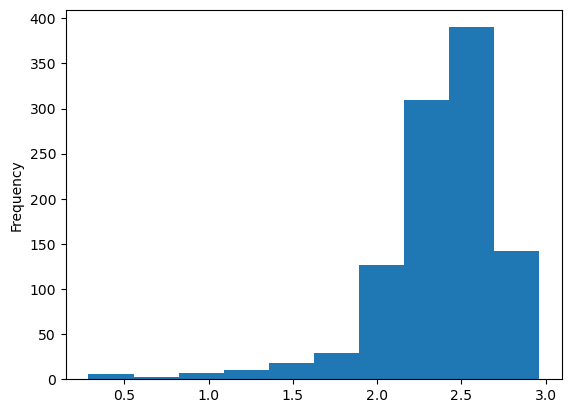

In [1204]:
np.log(y).plot(kind='hist')

<AxesSubplot: >

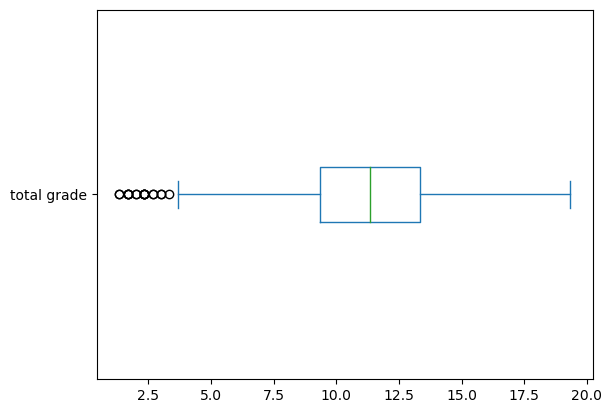

In [1205]:
y.plot(kind='box',vert=False)

<AxesSubplot: ylabel='Density'>

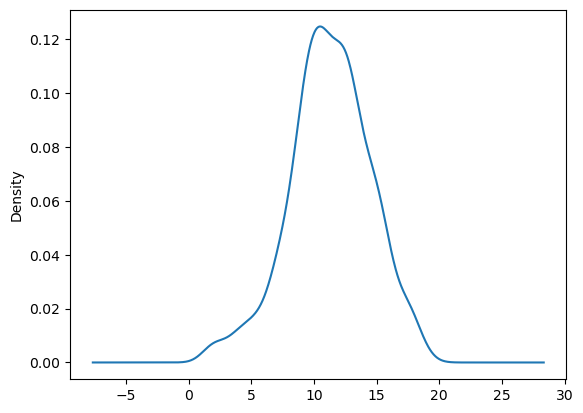

In [1206]:
y.plot(kind='density')

In [1207]:
#Preparing Training, Testing, And Validating Dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Modeling and Evaluation
This is a step where we tested our data train to machine learning model and evaluated it.
We tested it to 5 different models: 

Logistic Regression

Decision tree Regressor

Random Forest Regressor

Lasso

Ridge

The goal of its action is that at the conclusion of this stage, we will not only be able to identify the best model but also the best preprocessing method for the dataset. We did it to obtain a better outcome because, as we all know, data science is an experimental field. What we have accomplished so far: Splitting and Preprocessing Data (Data Train and Data Test) Testing Feature Engineering Models tuning hyperparameters and choosing features Model Optional Most influential/influence on model output is evaluation.

# Linear Regression

In [1208]:
from sklearn.linear_model import LinearRegression

In [1209]:
reg=LinearRegression()

In [1210]:
regmodel=reg.fit(X_train,y_train)

In [1211]:
regmodel.score(X_train,y_train)

0.300302312123488

In [1212]:
regtestpredict=regmodel.predict(X_test)

In [1213]:
#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [1214]:
mse=mean_squared_error(y_test,regtestpredict)
mse

5.585307015418561

In [1215]:
#Mean Absolute Error
mae = mean_absolute_error(y_test,regtestpredict)
mae

1.8557262442204232

In [1216]:
#Root Mean Squared Error
rmse=np.sqrt(mse)
rmse

2.3633254146262974

# Decision Tree Regressor

In [1217]:
#Build a Machine Learning Model DecisionTree
from sklearn.tree import DecisionTreeRegressor

In [1218]:
tree= DecisionTreeRegressor(max_depth=8,random_state=4)

In [1219]:
tree=tree.fit(X_train,y_train)

In [1220]:
tree.score(X_train,y_train)

0.6659865158249589

In [1221]:
treepredict=tree.predict(X_test)

In [1222]:
tree_mse = mean_squared_error(y_test,treepredict)
tree_mse

9.550219036020545

In [1223]:
tree_mae = mean_absolute_error(y_test,treepredict)
tree_mae

2.3806080997412593

In [1224]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse,round(tree_rmse,2)

(3.090342867065165, 3.09)

# Random Forest Regressor


In [1225]:
from sklearn.ensemble import RandomForestRegressor

In [1226]:
random= RandomForestRegressor(n_estimators=1000)

In [1227]:
random = random.fit(X_train, y_train)

In [1228]:
random.score(X_train, y_train)

0.9092210785475834

In [1229]:
randompredict = random.predict(X_test)

In [1230]:
random_mse = mean_squared_error(y_test,randompredict)
round(random_mse,2)

5.06

In [1231]:
random_mae = mean_absolute_error(y_test,randompredict)
round(random_mae,2)

1.71

In [1232]:
random_rmse = np.sqrt(random_mse)
round(random_mse,2)

5.06

# Lasso

In [1233]:
from sklearn.linear_model import Lasso

In [1234]:
lasso=Lasso(random_state=40)

In [1235]:
lasso = lasso.fit(X_train, y_train)

In [1236]:
lasso.score(X_train, y_train)

0.039601483570470664

In [1237]:
lassopredict = lasso.predict(X_test)

In [1238]:
lasso_mse = mean_squared_error(y_test, lassopredict)
lasso_mse 

7.91376034223011

In [1239]:
lasso_mae = mean_absolute_error(y_test,lassopredict)
round(lasso_mae,2)

2.3

In [1240]:
lasso_rmse = np.sqrt(lasso_mse)
round(lasso_rmse,2)

2.81

In [1241]:
pd.DataFrame(X_train.columns,np.round(lasso.coef_,2)).sort_index()

,0
-0.01,index
0.00,index
-0.00,Dalc
-0.00,goout
-0.00,freetime
0.00,famrel
-0.00,romantic
0.00,internet
0.00,higher
0.00,nursery


# Ridge

In [1242]:
from sklearn.linear_model import Ridge

In [1243]:
model_ridge = Ridge(random_state=42)

In [1244]:
model_ridge = model_ridge.fit(X_train, y_train)

In [1245]:
model_ridge.score(X_train, y_train)

0.30028807375735866

In [1246]:
y_pred_ridge = model_ridge.predict(X_test)

In [1247]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mse

5.578233207524984

In [1248]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mae

1.854437798039441

In [1249]:
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

2.36182836114841

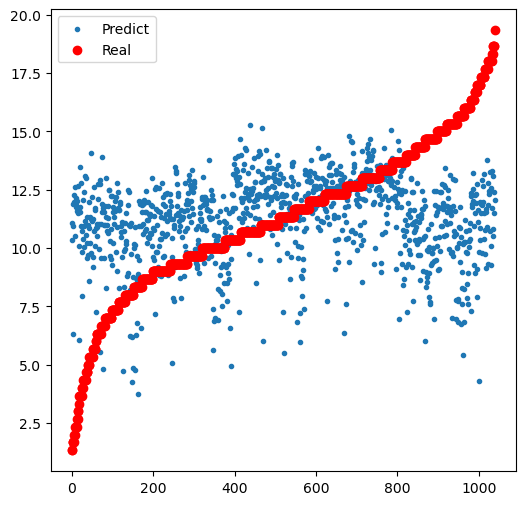

In [1250]:
#Visualize The Machine Learning Model

fig = plt.figure(figsize=(6,6))
data = data.sort_values(by=['total grade'])
X = data_new
y = data['total grade']
plt.scatter(range(X.shape[0]), model_ridge.predict(X), marker='.', label='Predict')
plt.scatter(range(X.shape[0]), y, color='red', label='Real')
plt.legend(loc='best', prop={'size': 10})
plt.show()

In [1251]:
#Validating The Machine Learning Model
for i in range(10):
    real = y_val.iloc[i]
    pred = int(model_ridge.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value      ----->>>>> {real}\n'
          f'Predicted Value ----->>>>> {pred}')
    print()

Real Value      ----->>>>> 13.0
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 8.333333333333334
Predicted Value ----->>>>> 8

Real Value      ----->>>>> 12.333333333333334
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 9.333333333333334
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 9.666666666666666
Predicted Value ----->>>>> 8

Real Value      ----->>>>> 12.333333333333334
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 9.666666666666666
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 15.666666666666666
Predicted Value ----->>>>> 13

Real Value      ----->>>>> 10.666666666666666
Predicted Value ----->>>>> 9

Real Value      ----->>>>> 12.333333333333334
Predicted Value ----->>>>> 13



# Final Presentation Material
Based on our project's result, out best model is Ridge with RMSE : 2.36182836114841. 

